In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

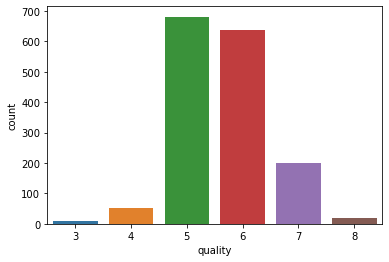

In [12]:
sns.countplot(x='quality',data=df)

In [13]:
conditions=[(df['quality']>=7),df['quality']<=4]
rating=['good','bad']
df['rating']=np.select(conditions,rating,default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [14]:
df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


# Let's check the corelation between the target variable and predictor variables

<AxesSubplot:>

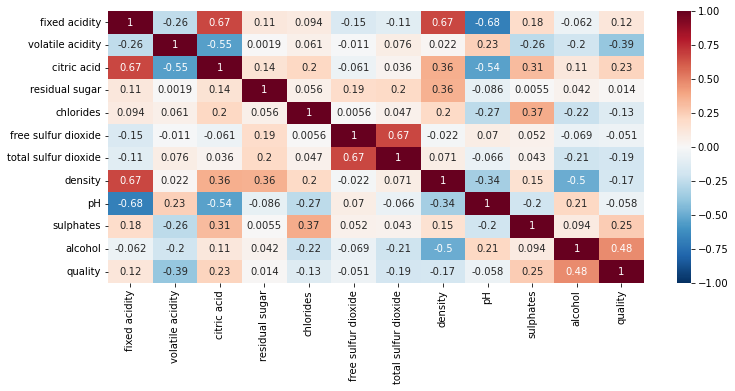

In [15]:
correlation=df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation,annot=True,linewidth=0,vmin=-1,cmap='RdBu_r')

In [16]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.
This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

Analysis of alcohol percentage with wine quality:

[Text(0.5, 0, 'wine quality'),
 Text(0, 0.5, 'alcohol percent'),
 Text(0.5, 1.0, 'alcohol percent')]

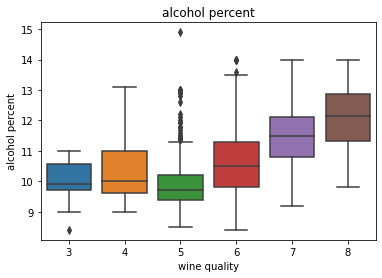

In [17]:
bx=sns.boxplot(x='quality',y='alcohol',data=df)
bx.set(xlabel='wine quality',ylabel='alcohol percent',title='alcohol percent')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different type of wine rating')]

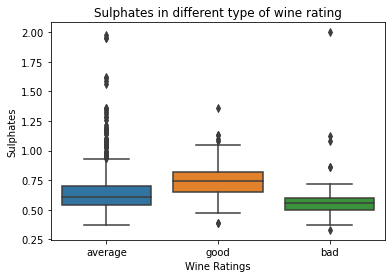

In [18]:
bx = sns.boxplot(x="rating", y='sulphates', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different type of wine rating')

In [19]:
bx=sns.violinplot(x='rating',y=' citric acid ',data=df);
bx.set(xlabel='wine ratings',ylaver='citric acid',title='citric_acid in diffrent type of wine rating')

ValueError: Could not interpret input ' citric acid '

In [20]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = df);
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in diffrent type of wine rating')

ValueError: Could not interpret input 'fixed_acidity'

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

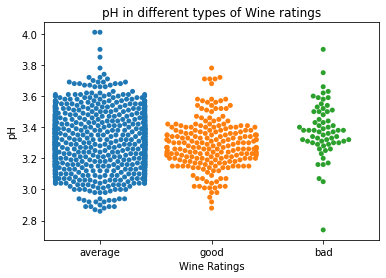

In [21]:
bx = sns.swarmplot(x="rating", y="pH", data = df);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

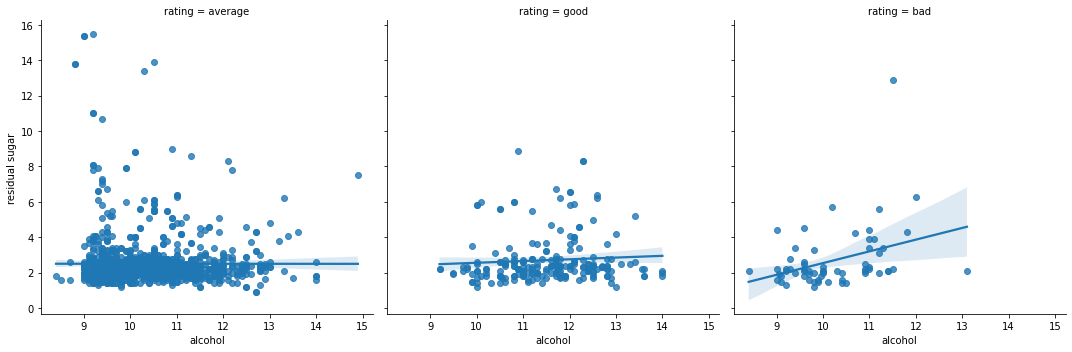

In [22]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = df)

In [23]:
y,X = dmatrices('quality ~ alcohol', data=df, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.83e-91
Time:                        23:09:56   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = sm.OLS.from_formula('quality ~ alcohol', data = df)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64


The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.

Classification

Classification using Statsmodel:

We will use statsmodel for this logistic regression analysis of predicting good wine quality (>4).

Let's create a new categorical variable/column (rate_code) with two possible values (good = 1 & bad = 0).

In [25]:
df['rate_code']=(df['quality']>4).astype(np.float32)

<AxesSubplot:ylabel='Density'>

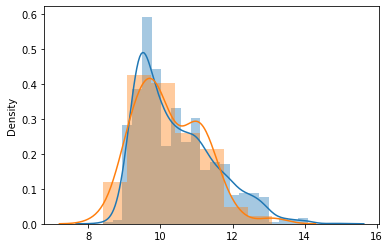

In [26]:
y,x=dmatrices('rate_code ~ alcohol',data=df)
sns.distplot(x[y[:,0]>0,1])
sns.distplot(x[y[:,0]==0,1])

In [27]:
model=sm.Logit(y,x)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2022-06-09 23:11 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

<AxesSubplot:ylabel='Density'>

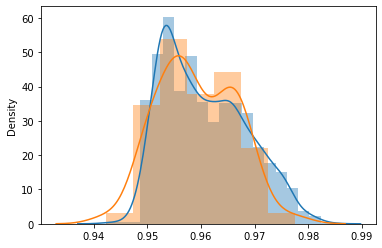

In [28]:
yhat=result.predict(x)
sns.distplot(yhat[y[:,0]>0])
sns.distplot(yhat[y[:,0]==0])

In [29]:
yhat=result.predict(x)>0.955
print(sklearn.metrics.classification_report(y,yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



The above distribution plot displays the overlapped outcomes for the good and bad quality plots of the red wine.

We can observe that the precision for the good wine prediction is almost 96% accurate, where as for bad wine its only 4%, which is not good. But overall there is 92% average precision in wine quality rate prediction.

Classification using Sklearn's LogisticRegression:

In [30]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate code ~ alcohol + sulphates  + citric acid + fixed acidity', data = df)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

SyntaxError: invalid syntax (<unknown>, line 1)

In [31]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599



Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of red wine quality, we can observe that the values have been improved significantly.

The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.

This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous two models (i.e. statsmodel and sklearn's linear regression model)

# Conclusion

We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.

To make predictions of wine quality and any other if required, we trained two models. As seen, the statsmodel and sklearn's Linear Regression model along with Random Forest Classifier. The Random Forest Classifier performed marginally better and we decided to stick with it if we had to make any more predictions.

The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.